# LISTA 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import diric
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import chirp, square, sawtooth

### Zadanie 1
Przygotuj w Pythonie kod, który przedstawi na wykresie okno Hamminga, Hanna, Blackmana oraz Dirichleta oraz ich widma amplitudowe (pakiet SciPy).

In [2]:
def plot_windows(m, n):
    hamming_window = np.hamming(m)
    hann_window = np.hanning(m)
    blackman_window = np.blackman(m)
    dirichlet_window = diric(np.linspace(-np.pi, np.pi, m), n)

    windows = {
    'Hamming': hamming_window,
    'Hann': hann_window,
    'Blackman': blackman_window,
    'Dirichlet': dirichlet_window   
    }

    for label, win in windows.items():
        plt.plot(win, label=label)
    plt.xlabel('Liczba próbek')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.title(f'Typowe funkcje okien czasowych dla M = {m}')

    # Widma amplitudowe
    
    for label, win in windows.items():
        widmo = np.fft.fft(win)
        widmo_amp_pelne = np.abs(widmo)

        widmo_amp_rzecz = np.abs(np.fft.rfft(win)) / (len(win)/2)
        f_widmo = np.fft.rfftfreq(len(win), 1/m)

        widmo_db = 20 * np.log10(widmo_amp_rzecz)

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.plot(widmo_amp_pelne)
        plt.xlabel('indeks widma')
        plt.ylabel('amplituda widma')
        plt.title(f'Pełne widmo dla okna {label}a')
        plt.grid()
        
        plt.subplot(1, 3, 2)
        plt.plot(f_widmo, widmo_amp_rzecz)
        plt.xlabel('częstotliwość [Hz]')
        plt.ylabel('amplituda widma')
        plt.title(f'Widmo "rzeczywiste" dla okna {label}a')
        plt.grid()
        plt.tight_layout()
        

        plt.subplot(1, 3, 3)
        plt.plot(f_widmo, widmo_db)
        plt.title(f"Widmo okna {label}a (dB)")
        plt.xlabel("częstotliwość [Hz]")
        plt.ylabel("amplituda [dB]")
        # plt.ylim(-100, 5)
        plt.grid()
        plt.tight_layout()
        



m_slider = widgets.IntSlider(min=30, max=2000, step=10, value=1000, description="M - próbki")
n_slider = widgets.IntSlider(min=3, max=30, step=1, value=21, description="n (Dirichlet)")

display(widgets.interactive(plot_windows, m=m_slider, n=n_slider))

interactive(children=(IntSlider(value=1000, description='M - próbki', max=2000, min=30, step=10), IntSlider(va…

### Zadanie 2
Przygotuj w Pythonie kod, który wyznaczy widmo sygnału sinusoidalnego o trzech różnych częstotliwościach przy zastosowanych oknach: Hamminga, Hanna, Blackmana oraz Dirichleta

In [3]:
def generate_signals(f=5, fs=1000):
    # Parametry sygnału
    t = np.linspace(0, 1, fs, endpoint=False)  # Oś czasu 1 sekunda

    # a) Sygnał sinusoidalny
    sin_wave = np.sin(2 * np.pi * f * t)  # 5 Hz

    # b) Sygnał prostokątny
    square_wave = square(2 * np.pi * f * t)  # 5 Hz

    # c) Sygnał piłokształtny
    sawtooth_wave = sawtooth(2 * np.pi * f * t)  # 5 Hz

    # d) Sygnał świergotliwy (chirp)
    chirp_wave = chirp(t, f0=f, f1=5*f, t1=1, method='linear')

    return t, [sin_wave, square_wave, sawtooth_wave, chirp_wave]

In [4]:
def signal_in_windows(m, n, f):
    t, signals = generate_signals(f, m)

    hamming_window = np.hamming(m)
    hann_window = np.hanning(m)
    blackman_window = np.blackman(m)
    dirichlet_window = diric(np.linspace(-np.pi, np.pi, m), n)

    windows = {
    'Hamming': hamming_window,
    'Hann': hann_window,
    'Blackman': blackman_window,
    'Dirichlet': dirichlet_window   
    }

    signal_names = ['sinus', 'prostokątny', 'piłokształtny', 'świergotliwy']

    for i, signal in enumerate(signals):
        for label, win in windows.items():
            widmo_amp_rzecz = np.abs(np.fft.rfft(signal)) / (len(signal)/2)
            widmo_okno = np.abs(np.fft.rfft(signal * win)) / (len(signal)/2)
            f_widmo = np.fft.rfftfreq(len(signal), 1/m)

            plt.plot(f_widmo, 20 * np.log10(widmo_okno), label=label+'a')
            
        plt.plot(f_widmo, 20 * np.log10(widmo_amp_rzecz), label='prostokątne')
        plt.xlabel('częstotliwość [Hz]')
        plt.ylabel('amplituda [dB]')
        plt.suptitle('Widmo dla różnych typów okna')
        plt.title(f'Sygnał: {signal_names[i]}. Częstotliwość: f0={f}Hz, fk={5*f}Hz' if signal_names[i] == 'świergotliwy'
                  else f'Sygnał: {signal_names[i]}. Częstotliwość: {f}Hz')
        plt.legend(title='Rodzaj okna')
        plt.show()


m_slider = widgets.IntSlider(min=30, max=2000, step=10, value=1000, description="M - próbki")
n_slider = widgets.IntSlider(min=3, max=30, step=1, value=21, description="n (Dirichlet)")
f_slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description="f [Hz]")

display(widgets.interactive(signal_in_windows, m=m_slider, n=n_slider, f=f_slider))

interactive(children=(IntSlider(value=1000, description='M - próbki', max=2000, min=30, step=10), IntSlider(va…

### Zadanie 3
Przygotuj w Pythonie kod, który wyznaczy widmo sygnału sinusoidalnego z wykorzystaniem Szybkiej Transformaty Fouriera (np. pakiet SciPy oferuje funkcję fft)

In [5]:
def widmo_sygnalu(f=5, fs=1000):
    
    t, signals = generate_signals(f, fs)
    labels = ['sinus', 'prostokątny', 'piłokształtny', 'świergotliwy']
    
    for i, signal in enumerate(signals):
        widmo = np.fft.fft(signal)
        widmo_amp_pelne = np.abs(widmo)

        widmo_amp_rzecz = np.abs(np.fft.rfft(signal)) / (len(signal)/2)
        f_widmo = np.fft.rfftfreq(len(signal), 1/fs)

        plt.figure(figsize=(8, 6))
        plt.scatter(t, signal, color='red', label='dane')
        plt.plot(t, signal, linewidth=1, label='wykres z danych')
        plt.xlabel("Czas [s]")
        plt.ylabel("Amplituda")
        plt.legend()
        plt.suptitle(f'Sygnał {labels[i]}')
        plt.title(f"f0={f}Hz, fk={5*f}Hz, fs={fs}Hz" if labels[i] == 'świergotliwy' else f"f={f}Hz, fs={fs}Hz")
        plt.grid()
        

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(widmo_amp_pelne)
        plt.xlabel('indeks widma')
        plt.ylabel('amplituda widma')
        plt.suptitle(f'Sygnał {labels[i]}, f={f}Hz')
        plt.title(f'Pełne widmo sygnału')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(f_widmo, widmo_amp_rzecz)
        plt.xlabel('częstotliwość [Hz]')
        plt.ylabel('amplituda widma')
        plt.title(f'Widmo "rzeczywiste" sygnału')
        plt.grid()
        plt.tight_layout()
        
    


f_slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description="f [Hz]")
fs_slider = widgets.IntSlider(min=10, max=1000, step=10, value=200, description="fs [Hz]")

display(widgets.interactive(widmo_sygnalu, f=f_slider, fs=fs_slider))

interactive(children=(IntSlider(value=5, description='f [Hz]', max=20, min=1), IntSlider(value=200, descriptio…

### Zadanie 4
Przygotuj w Pythonie kod, który wyznaczy widmo dowolnego sygnału załadowanego z pliku np. csv.

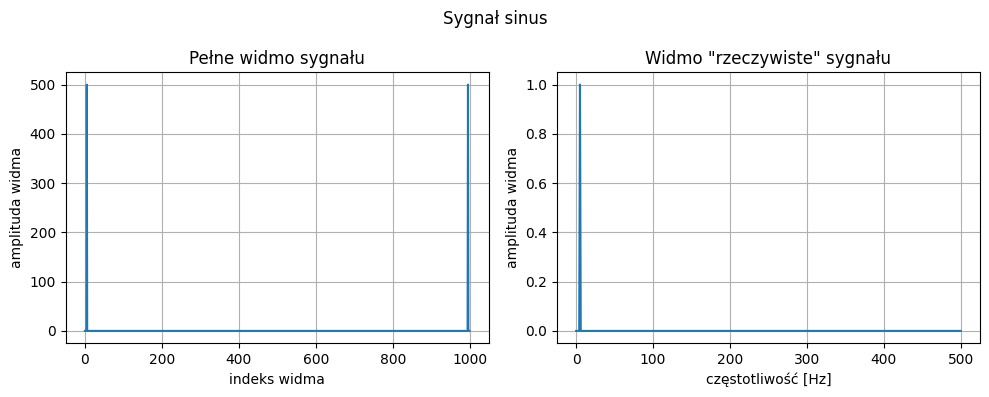

In [7]:
def widmo_sygnalu_csv(signal, label = '', fs=1000):
    
    
    widmo = np.fft.fft(signal)
    widmo_amp_pelne = np.abs(widmo)

    widmo_amp_rzecz = np.abs(np.fft.rfft(signal)) / (len(signal)/2)
    f_widmo = np.fft.rfftfreq(len(signal), 1/fs)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(widmo_amp_pelne)
    plt.xlabel('indeks widma')
    plt.ylabel('amplituda widma')
    plt.suptitle(f'Sygnał {label}')
    plt.title(f'Pełne widmo sygnału')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(f_widmo, widmo_amp_rzecz)
    plt.xlabel('częstotliwość [Hz]')
    plt.ylabel('amplituda widma')
    plt.title(f'Widmo "rzeczywiste" sygnału')
    plt.grid()
    plt.tight_layout()


plik = str(input('Podaj nazwę pliku: '))
signal = pd.read_csv(plik)
widmo_sygnalu_csv(signal['amplituda'], label=plik.replace('.csv', ''))